In [1]:
# 1) Design model (input, output size,forward pass)
# 2) Construct loss and optimizer
# 3) Training loop
#    -forward pass: compute prediction
#    -backward pass: gradients
#    -update weights... iterate this a couple of times
# 4) We replace our forward method with a pytorch module, and we don't need our weights. pytorch knows our parameter

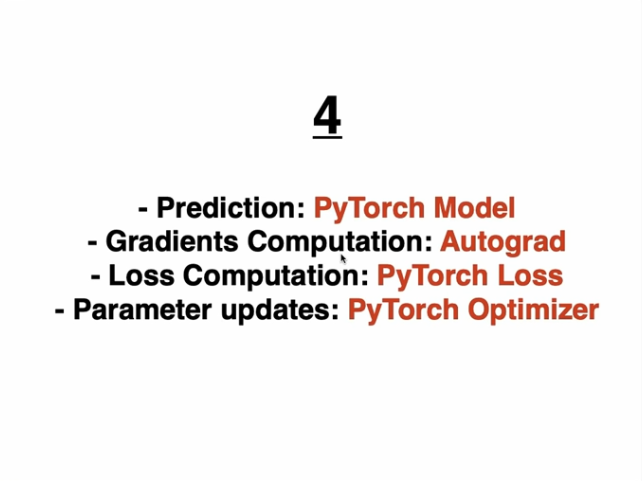

In [2]:
import torch
import torch.nn as nn

In [3]:
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

In [4]:
X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

4 1


In [5]:
input_size = n_features
output_size = n_features

In [6]:
# model = nn.Linear(input_size, output_size) # only 1 layer... 

In [7]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
             return self.lin(x)
    

In [8]:
model = LinearRegression(input_size, output_size)

In [9]:
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}') #item to get the actual float value

Prediction before training: f(5) = 1.286


In [10]:
# Training
learning_rate = 0.01
n_iters = 100
loss = nn.MSELoss()
# Now we update our optimizer so we don't have the manually added weights anymore
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


In [11]:
for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss --still the same because it's still a callable function
    l = loss(Y,y_pred)
    
    # Gradients = backward pass (UPDATED)
    l.backward() # calculate the gradient of our loss --- dl/dw
    
    # update weights (UPDATED) - no need to manually update weights anymore
    optimizer.step()
    
    #zero gradients (ADDED) - still have to zero out our gradient, but different function from manual 
#     b/c when we call backwards, it will write our gradients and accumulate w.grad attribute
    optimizer.zero_grad()
    
        
    if epoch % 10 == 0:
        [w,b] = model.parameters() #unpack weights and bias
        print(f'epoch: {epoch+1}, w: {w[0][0].item():.3f}, loss: {l:.8f}') 
        #items cause we don't want to see the tensor
print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

epoch 1:w = 0.734, loss = 26.47764778
epoch 11:w = 1.907, loss = 0.71011549
epoch 21:w = 2.093, loss = 0.04198806
epoch 31:w = 2.120, loss = 0.02332754
epoch 41:w = 2.121, loss = 0.02155024
epoch 51:w = 2.118, loss = 0.02028502
epoch 61:w = 2.115, loss = 0.01910406
epoch 71:w = 2.111, loss = 0.01799206
epoch 81:w = 2.108, loss = 0.01694485
epoch 91:w = 2.105, loss = 0.01595854
Prediction after training: f(5) = 10.210


In [12]:
# Below is error codes that I encountered and the solution

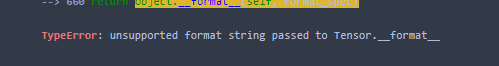

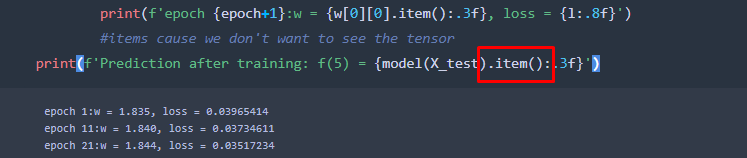